<a href="https://colab.research.google.com/github/irissun9602/Mouse-Dynamics/blob/main/Login_data%2BMouse_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
import os
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

file_path = f'/content/drive/MyDrive/Colab Notebooks/rba-dataset40.csv'

login_data = pd.read_csv(file_path)

# 결과 출력
print(login_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      index Login Timestamp       User ID  Round-Trip Time [ms]  \
0    482071         51:52.0  2.670000e+18                   NaN   
1    482072         51:53.8  5.810000e+18                   NaN   
2    482073         51:54.1  4.660000e+18                   NaN   
3    482074         51:54.6 -4.320000e+18                   NaN   
4    482075         51:56.9 -8.310000e+18                   NaN   
..      ...             ...           ...                   ...   
374  482445         01:48.4  5.520000e+18                   NaN   
375  482446         01:48.7  5.620000e+18                   NaN   
376  482447         01:49.9 -4.320000e+18                   NaN   
377  482448         01:50.4 -4.320000e+18                   NaN   
378  482449         01:50.6 -4.320000e+18                   NaN   

          IP Address Country             Region                 Ci

In [49]:
login_data['User ID'] = login_data['User ID'].astype(int)

In [50]:
login_data

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482071,51:52.0,2670000000000000000,NaN,109.247.53.155,NO,Agder,Byglandsfjord,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False
1,482072,51:53.8,5810000000000000000,NaN,209.236.125.125,US,-,-,393398,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 63.0.3239,Android 2.2,mobile,True,True,False
2,482073,51:54.1,4660000000000000000,NaN,213.205.109.136,FR,-,-,43646,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.19,Mac OS X 10.14.6,desktop,True,False,False
3,482074,51:54.6,-4320000000000000000,NaN,199.26.84.38,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 81.0.4044,Android 4.1,mobile,False,False,False
4,482075,51:56.9,-8310000000000000000,NaN,10.0.186.103,GB,England,Charlton Horethorne,29550,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Edge 81.0.416,Mac OS X 10.14.6,desktop,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,482445,01:48.4,5520000000000000000,NaN,84.234.240.165,NO,Agder,Faervik,29695,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.203,Mac OS X 10.14.6,desktop,True,False,False
375,482446,01:48.7,5620000000000000000,NaN,199.26.84.139,US,-,-,393398,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 81.0.4044.2917.2918,Windows Phone 8.1,mobile,False,False,False
376,482447,01:49.9,-4320000000000000000,NaN,212.18.220.169,DE,Baden-Württemberg,Sindelfingen,8937,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile WebView 85.0.4183,iOS 11.2.6,mobile,False,False,False
377,482448,01:50.4,-4320000000000000000,NaN,10.0.80.35,PL,Lesser Poland,Greboszow,205727,Mozilla/5.0 (Mobile; LYF/F220B/LYF-F220B-003-...,Chrome Mobile WebView 85.0.4183,KaiOS 2.5,mobile,False,False,False


In [51]:
# 'User ID' 열의 앞자리 3개를 가져오고 절댓값을 씌워주는 함수
def process_user_id(user_id):
    return abs(int(str(user_id)[:3]))

# 'User ID' 열에 함수를 적용하여 처리
login_data['User ID'] = login_data['User ID'].apply(lambda x: process_user_id(x))

In [57]:
duplicate_counts = login_data['User ID'].value_counts()
print(duplicate_counts)

43     153
55       8
906      6
21       5
86       4
      ... 
858      1
496      1
310      1
997      1
562      1
Name: User ID, Length: 143, dtype: int64


In [58]:
import pandas as pd

# 원하는 User ID 값들
desired_ids = [55, 906, 21, 86]

# 새로운 데이터프레임을 담을 리스트
dfs = []

for id_value in desired_ids:
    # 원하는 User ID 값을 가진 행들을 선택
    selected_rows = login_data[login_data['User ID'] == id_value].head(300)

    # 선택된 행들을 새로운 데이터프레임에 추가
    dfs.append(selected_rows)

# 데이터프레임을 합쳐서 새로운 데이터프레임 생성
result_df = pd.concat(dfs, ignore_index=True)


In [59]:

result_df

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482107,52:48.2,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
1,482135,53:20.6,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
2,482163,54:02.6,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,False,False,False
3,482192,54:43.1,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
4,482209,55:21.5,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
5,482266,57:11.9,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
6,482279,57:36.5,55,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
7,482439,01:41.4,55,NaN,109.203.3.75,NO,Innlandet,Skarnes,29492,Mozilla/5.0 (Linux; U; Android 13.0; i phone X...,Opera Mobile 52.1.2254,Android 13.0,mobile,True,False,False
8,482218,55:37.8,906,NaN,200.14.248.38,CL,Santiago Metropolitan,Santiago,263173,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False
9,482238,56:28.1,906,NaN,200.14.248.38,CL,Santiago Metropolitan,Santiago,263173,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False


In [60]:
# 사용자 ID에 대한 매핑 딕셔너리
id_mapping = {55: 7, 906: 9, 21: 16, 86: 20}

# 'user_id' 열의 값 변경
result_df['User ID'] = result_df['User ID'].map(id_mapping)

In [61]:
result_df

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482107,52:48.2,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
1,482135,53:20.6,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
2,482163,54:02.6,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,False,False,False
3,482192,54:43.1,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
4,482209,55:21.5,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
5,482266,57:11.9,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
6,482279,57:36.5,7,NaN,10.2.185.115,CA,Ontario,Whitney,32773,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Firefox 20.0.0.1618,iOS 11.2.6,mobile,True,False,False
7,482439,01:41.4,7,NaN,109.203.3.75,NO,Innlandet,Skarnes,29492,Mozilla/5.0 (Linux; U; Android 13.0; i phone X...,Opera Mobile 52.1.2254,Android 13.0,mobile,True,False,False
8,482218,55:37.8,9,NaN,200.14.248.38,CL,Santiago Metropolitan,Santiago,263173,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False
9,482238,56:28.1,9,NaN,200.14.248.38,CL,Santiago Metropolitan,Santiago,263173,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False


In [64]:
# 'User ID' 열에서 중복된 값이 2개 이상인 행들을 확인합니다.
duplicates_mask = result_df['User ID'].duplicated(keep=False)

In [65]:
duplicates_mask

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
Name: User ID, dtype: bool

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

login_data_copy = result_df.copy()

# 'Login Timestamp' 열을 Label Encoding
login_data_copy['Login Timestamp'] = label_encoder.fit_transform(login_data_copy['Login Timestamp'])

# 'IP Address' 열을 Label Encoding
login_data_copy['IP Address'] = label_encoder.fit_transform(login_data_copy['IP Address'])

login_data_copy['Country'] = label_encoder.fit_transform(login_data_copy['Country'])
login_data_copy['Region'] = label_encoder.fit_transform(login_data_copy['Region'])
login_data_copy['City'] = label_encoder.fit_transform(login_data_copy['City'])
login_data_copy['User Agent String'] = label_encoder.fit_transform(login_data_copy['User Agent String'])
login_data_copy['Browser Name and Version'] = label_encoder.fit_transform(login_data_copy['Browser Name and Version'])
login_data_copy['OS Name and Version'] = label_encoder.fit_transform(login_data_copy['OS Name and Version'])
login_data_copy['Device Type'] = label_encoder.fit_transform(login_data_copy['Device Type'])


In [67]:
login_data_copy

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482107,5,7,NaN,1,0,3,9,32773,4,4,4,1,True,False,False
1,482135,6,7,NaN,1,0,3,9,32773,4,4,4,1,True,False,False
2,482163,7,7,NaN,1,0,3,9,32773,4,4,4,1,False,False,False
3,482192,8,7,NaN,1,0,3,9,32773,4,4,4,1,True,False,False
4,482209,9,7,NaN,1,0,3,9,32773,4,4,4,1,True,False,False
5,482266,14,7,NaN,1,0,3,9,32773,4,4,4,1,True,False,False
6,482279,16,7,NaN,1,0,3,9,32773,4,4,4,1,True,False,False
7,482439,4,7,NaN,3,2,1,8,29492,8,7,0,1,True,False,False
8,482218,10,9,NaN,5,1,6,7,263173,3,2,4,1,True,False,False
9,482238,11,9,NaN,5,1,6,7,263173,3,2,4,1,True,False,False


In [68]:
columns_to_drop = ['Round-Trip Time [ms]' ]

In [70]:
login_data_copy = login_data_copy.drop(columns=columns_to_drop)

KeyError: ignored

In [71]:
import os
import pandas as pd

user_folders = ['user7', 'user9', 'user16']  # 사용자 폴더를 필요에 따라 추가

# 모든 CSV 파일을 저장할 빈 데이터프레임 생성
df = pd.DataFrame()

# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
for user_folder in user_folders:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/Mouse-Dynamics-Challenge-master/Mouse-Dynamics-Challenge-master/training_files/{user_folder}/'

    # 해당 폴더에 있는 모든 CSV 파일 목록 가져오기
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # 각 CSV 파일을 읽어와서 리스트에 추가
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        cs = pd.read_csv(file_path)
        cs['user_id'] = user_folder.replace('user', '')
        df = pd.concat([df, cs], ignore_index=True)

# 결과 출력
print(df)


         record timestamp  client timestamp    button     state     x   y  \
0                   0.000             0.000  NoButton      Move   250  46   
1                   0.000             0.015  NoButton      Move   252  46   
2                   0.000             0.031  NoButton      Move   257  46   
3                   0.000             0.062  NoButton      Move   268  46   
4                   0.138             0.078  NoButton      Move   283  46   
...                   ...               ...       ...       ...   ...  ..   
1081769          9956.833          9957.045  NoButton      Move  1819  11   
1081770          9956.857          9957.076  NoButton      Move  1822  11   
1081771          9956.858          9957.076      Left   Pressed  1822  11   
1081772          9956.945          9957.170  NoButton      Drag  1826  11   
1081773          9956.945          9957.170      Left  Released  1826  11   

        user_id  
0             7  
1             7  
2             7  
3  

In [37]:
login_data_copy

,index,Login Timestamp,User ID,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482107,5,55,1,0,3,9,32773,4,4,4,1,True,False,False
1,482135,6,55,1,0,3,9,32773,4,4,4,1,True,False,False
2,482163,7,55,1,0,3,9,32773,4,4,4,1,False,False,False
3,482192,8,55,1,0,3,9,32773,4,4,4,1,True,False,False
4,482209,9,55,1,0,3,9,32773,4,4,4,1,True,False,False
5,482266,14,55,1,0,3,9,32773,4,4,4,1,True,False,False
6,482279,16,55,1,0,3,9,32773,4,4,4,1,True,False,False
7,482439,4,55,3,2,1,8,29492,8,7,0,1,True,False,False
8,482218,10,906,5,1,6,7,263173,3,2,4,1,True,False,False
9,482238,11,906,5,1,6,7,263173,3,2,4,1,True,False,False


In [72]:
# df의 'user_id' 열을 문자열로 변환합니다.
df['user_id'] = df['user_id'].astype(str)

# login_data의 'User ID' 열을 문자열로 변환합니다.
login_data_copy['User ID'] = login_data_copy['User ID'].astype(str)

# df와 login_data를 'user_id' 열을 기준으로 조인합니다.
result = pd.merge(df, login_data_copy, left_on='user_id', right_on='User ID', how='outer')

# 조인된 결과를 출력합니다.
print(result)


         record timestamp  client timestamp    button     state       x     y  \
0                   0.000              0.00  NoButton      Move   250.0  46.0   
1                   0.000              0.00  NoButton      Move   250.0  46.0   
2                   0.000              0.00  NoButton      Move   250.0  46.0   
3                   0.000              0.00  NoButton      Move   250.0  46.0   
4                   0.000              0.00  NoButton      Move   250.0  46.0   
...                   ...               ...       ...       ...     ...   ...   
7102717          9956.945           9957.17      Left  Released  1826.0  11.0   
7102718               NaN               NaN       NaN       NaN     NaN   NaN   
7102719               NaN               NaN       NaN       NaN     NaN   NaN   
7102720               NaN               NaN       NaN       NaN     NaN   NaN   
7102721               NaN               NaN       NaN       NaN     NaN   NaN   

        user_id   index  Lo

In [94]:
all_data = result

로그인 데이터로만 훈련했을 때 Login_data_copy

In [95]:
all_data["button"].fillna(0, inplace=True)

In [96]:
di = {'NoButton': 0, 'Left': 1, 'Right': 2, 'Button.left': 1, 'Button.right': 2, 'Scroll' : 3}
dj = {'Move': 0, 'move' : 0, 'Pressed': 1, 'Released' : 2, 'Drag' : 3, 'Up' : 4, 'Down' : 5, 'Scrolled (0, 1)' : 6, 'Scrolled (0, -1)' : 7, 'Clicked' :1, 'Scrolled (0, -2)' : 8}
all_data["button"].replace(di, inplace=True)
all_data["state"].replace(dj, inplace=True)
print(all_data.head(10))
# print(df.describe())

   record timestamp  client timestamp  button  state      x     y user_id  \
0               0.0             0.000     0.0    0.0  250.0  46.0       7   
1               0.0             0.000     0.0    0.0  250.0  46.0       7   
2               0.0             0.000     0.0    0.0  250.0  46.0       7   
3               0.0             0.000     0.0    0.0  250.0  46.0       7   
4               0.0             0.000     0.0    0.0  250.0  46.0       7   
5               0.0             0.000     0.0    0.0  250.0  46.0       7   
6               0.0             0.000     0.0    0.0  250.0  46.0       7   
7               0.0             0.000     0.0    0.0  250.0  46.0       7   
8               0.0             0.015     0.0    0.0  252.0  46.0       7   
9               0.0             0.015     0.0    0.0  252.0  46.0       7   

    index  Login Timestamp User ID  ...  Region  City    ASN  \
0  482107                5       7  ...       3     9  32773   
1  482135               

In [99]:
# 'client timestamp'를 기준으로 데이터 정렬합니다.
all_data.sort_values("client timestamp", inplace=True)

# 'Serial_no' 열 추가 (옵션)
all_data.insert(0, "Serial_no", range(0, len(all_data.index)))

# 필요한 계산들을 수행합니다.
all_data["delta_client_time"] = all_data["client timestamp"].diff(-1).abs()
all_data["delta_x"] = all_data["x"].diff(-1)
all_data["delta_y"] = all_data["y"].diff(-1)
all_data["delta_dist"] = np.sqrt(all_data["delta_x"] ** 2 + all_data["delta_y"] ** 2)
all_data["mouse_speed"] = np.where(all_data["delta_client_time"] != 0, all_data["delta_dist"] / all_data["delta_client_time"], np.nan)
all_data["mouse_speed"] = all_data["mouse_speed"].abs()
all_data["slope"] = np.where(all_data["delta_x"] != 0, all_data["delta_y"] / all_data["delta_x"], np.nan)
all_data["delta_slope"] = all_data["slope"].diff(-1)
all_data["curvature"] = np.where(all_data["delta_x"] != 0, all_data["delta_slope"] / all_data["delta_x"], np.nan)
all_data["curvature"] = all_data["curvature"].abs()
# all_data["radius_of_curvature"] = 1 / all_data["curvature"]  # 원의 곡률 반지름 계산

# 결과 확인
print(all_data)


         Serial_no  record timestamp  client timestamp  button  state      x  \
0                0             0.000             0.000     0.0    0.0  250.0   
1486182          1             0.000             0.000     0.0    0.0   88.0   
2588104          2             0.000             0.000     0.0    0.0  757.0   
2588106          3             0.000             0.000     0.0    0.0  757.0   
2588107          4             0.000             0.000     0.0    0.0  757.0   
...            ...               ...               ...     ...    ...    ...   
6960577    7102717         18960.296         18960.393     1.0    2.0  264.0   
7102718    7102718               NaN               NaN     0.0    NaN    NaN   
7102719    7102719               NaN               NaN     0.0    NaN    NaN   
7102720    7102720               NaN               NaN     0.0    NaN    NaN   
7102721    7102721               NaN               NaN     0.0    NaN    NaN   

             y user_id   index  Login T

In [101]:
# clicks_so_far, click_frequency 계산 및 무한대 값 처리
clicks_so_far = []
for index, row in all_data.iterrows():
    if index != 0:
        clicks_so_far.append(clicks_so_far[-1] + (1 if row["button"] != 0 else 0))
    else:
        clicks_so_far.append(1 if row["button"] != 0 else 0)

all_data['clicks_so_far'] = clicks_so_far
all_data['click_frequency'] = all_data['clicks_so_far'] / all_data['client timestamp'].replace(0, 1)  # 0으로 나누는 것 방지

# inf 값을 0으로 처리
all_data['click_frequency'] = all_data['click_frequency'].replace([np.inf, -np.inf], 0)

In [102]:
all_data = all_data.dropna()
all_data.describe()


,Serial_no,record timestamp,client timestamp,button,state,x,y,index,Login Timestamp,IP Address,...,delta_client_time,delta_x,delta_y,delta_dist,mouse_speed,slope,delta_slope,curvature,clicks_so_far,click_frequency
count,1.111860e+05,111186.000000,111186.000000,111186.000000,111186.000000,111186.000000,111186.000000,111186.000000,111186.000000,111186.000000,...,1.111860e+05,111186.000000,111186.000000,111186.000000,1.111860e+05,111186.000000,111186.000000,111186.000000,111186.000000,111186.000000
mean,3.144142e+06,2419.446903,2419.270358,0.133875,0.306738,365.016837,357.141619,482258.716133,12.012430,3.088725,...,1.477489e-02,-9.405465,0.642761,319.869130,3.160323e+10,0.386771,0.041828,1.094014,223970.343011,101.097952
std,1.847925e+06,2145.342205,2145.248510,0.561977,1.014832,331.883772,281.256695,84.846176,5.715336,2.051791,...,1.660971e-02,519.346437,468.179176,621.839335,6.831958e+11,16.578299,22.044547,14.007400,139024.270292,12.086880
min,1.650000e+02,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,482107.000000,0.000000,0.000000,...,6.999956e-12,-65535.000000,-65535.000000,1.000000,1.883239e+00,-692.000000,-999.981308,0.000000,0.000000,0.000000
25%,1.574481e+06,966.332250,966.219250,0.000000,0.000000,201.000000,210.000000,482209.000000,8.000000,1.000000,...,1.500000e-02,-141.000000,-133.000000,62.585941,3.853426e+03,-0.500000,-0.899098,0.000849,104755.250000,98.252648
50%,3.089162e+06,2047.169000,2047.139500,0.000000,0.000000,298.000000,353.000000,482255.000000,11.000000,3.000000,...,1.500000e-02,-1.000000,0.000000,267.247077,2.111543e+04,0.250000,0.000000,0.007305,218680.000000,104.287307
75%,4.615862e+06,3141.165000,3140.873000,0.000000,0.000000,462.000000,486.000000,482311.000000,17.000000,5.000000,...,1.600000e-02,122.000000,135.000000,469.587585,5.544046e+04,1.105263,0.892250,0.076472,326586.000000,106.448469
max,7.102672e+06,18959.214000,18959.316000,3.000000,5.000000,65535.000000,65535.000000,482439.000000,22.000000,6.000000,...,9.360000e-01,64828.000000,64780.000000,92680.485810,7.582400e+13,936.000000,938.389831,938.389831,578659.000000,137.264957


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [104]:
X = all_data.drop(['user_id'], axis=1)  # Assuming 'session_id' is not a feature
# One-hot encode categorical columns
y = all_data['user_id']

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [106]:
# 데이터 스케일링
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)


In [107]:
all_data

,Serial_no,record timestamp,client timestamp,button,state,x,y,user_id,index,Login Timestamp,...,delta_client_time,delta_x,delta_y,delta_dist,mouse_speed,slope,delta_slope,curvature,clicks_so_far,click_frequency
5466108,165,0.110,0.015,0.0,0.0,351.0,399.0,9,482218,10,...,1.460000e-11,265.0,-152.0,305.497954,2.092452e+13,-0.573585,2.468584,0.009315,0,0.000000
1486190,181,0.264,0.015,0.0,0.0,86.0,551.0,7,482279,16,...,9.999998e-04,-412.0,189.0,453.282473,4.532826e+05,-0.458738,0.233570,0.000567,0,0.000000
4796971,211,0.146,0.016,0.0,0.0,457.0,352.0,9,482238,11,...,2.180000e-11,-88.0,-250.0,265.035847,1.215761e+13,2.840909,2.840909,0.032283,0,0.000000
3750330,269,0.104,0.016,0.0,0.0,271.0,415.0,9,482218,10,...,2.328000e-10,-117.0,168.0,204.726647,8.794100e+11,-1.435897,-2.310897,0.019751,0,0.000000
473599,285,0.160,0.016,0.0,0.0,388.0,247.0,7,482439,4,...,1.500000e-02,133.0,-155.0,204.240055,1.361600e+04,-1.165414,-1.354225,0.010182,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959497,7101637,18914.610,18914.591,0.0,3.0,651.0,448.0,16,482398,0,...,1.240000e-01,149.0,-10.0,149.335193,1.204316e+03,-0.067114,0.071775,0.000482,578544,30.587180
6959507,7101647,18914.720,18914.715,0.0,3.0,502.0,458.0,16,482398,0,...,1.100000e-01,106.0,-14.0,106.920531,9.720048e+02,-0.132075,0.055425,0.000523,578544,30.586980
6959674,7101817,18917.227,18917.289,0.0,0.0,676.0,463.0,16,482301,18,...,4.700000e-02,-9.0,0.0,9.000000,1.914894e+02,-0.000000,-0.000000,0.000000,578569,30.584139
6960451,7102592,18956.378,18956.477,0.0,0.0,668.0,813.0,16,482375,21,...,1.090000e-01,-4.0,-18.0,18.439089,1.691660e+02,4.500000,-0.500000,0.125000,578659,30.525661


In [112]:
all_data.describe

<bound method NDFrame.describe of          Serial_no  record timestamp  client timestamp  button  state      x  \
5466108        165             0.110             0.015     0.0    0.0  351.0   
1486190        181             0.264             0.015     0.0    0.0   86.0   
4796971        211             0.146             0.016     0.0    0.0  457.0   
3750330        269             0.104             0.016     0.0    0.0  271.0   
473599         285             0.160             0.016     0.0    0.0  388.0   
...            ...               ...               ...     ...    ...    ...   
6959497    7101637         18914.610         18914.591     0.0    3.0  651.0   
6959507    7101647         18914.720         18914.715     0.0    3.0  502.0   
6959674    7101817         18917.227         18917.289     0.0    0.0  676.0   
6960451    7102592         18956.378         18956.477     0.0    0.0  668.0   
6960532    7102672         18959.214         18959.316     0.0    0.0  236.0   

     

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.7, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

          16       1.00      1.00      1.00      9597
           7       1.00      1.00      1.00     37694
           9       1.00      1.00      1.00     30540

    accuracy                           1.00     77831
   macro avg       1.00      1.00      1.00     77831
weighted avg       1.00      1.00      1.00     77831



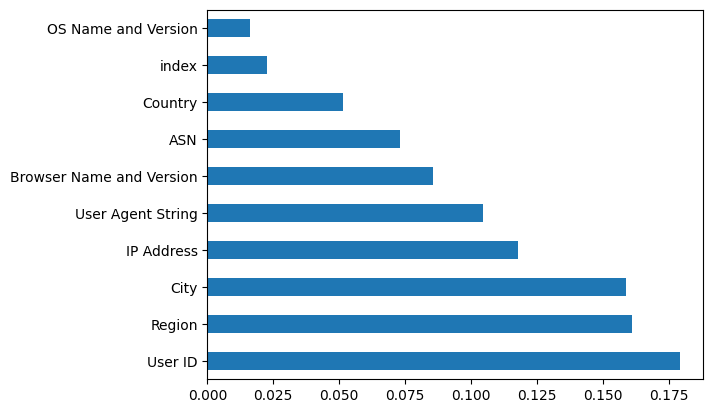

In [113]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

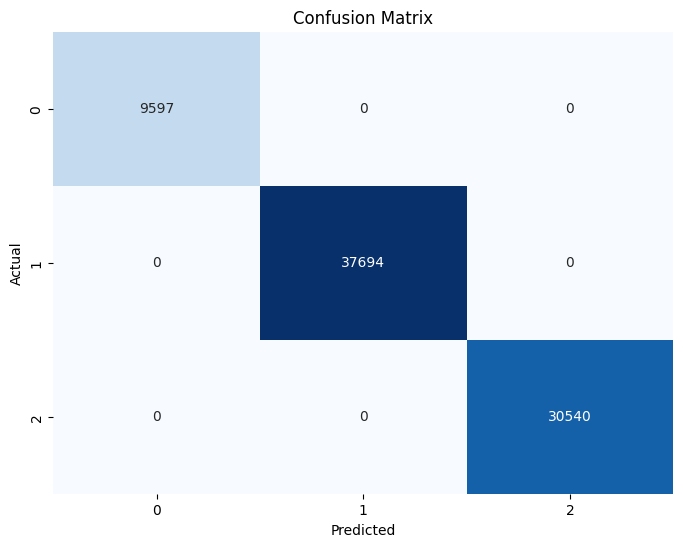

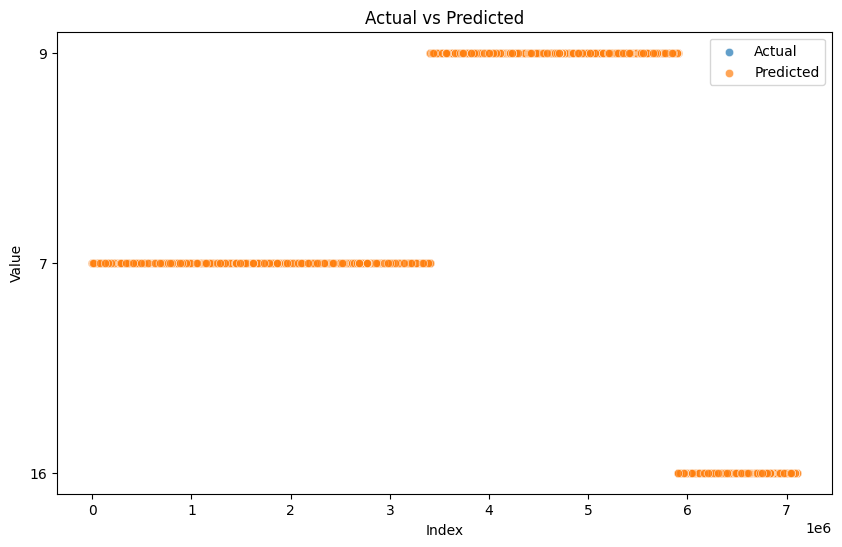

In [114]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# 결과 출력
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

In [ ]:
y

0      267
2      466
4       83
5      200
7      350
      ... 
363    440
367     34
368     55
371     77
375    562
Name: User ID, Length: 135, dtype: int64

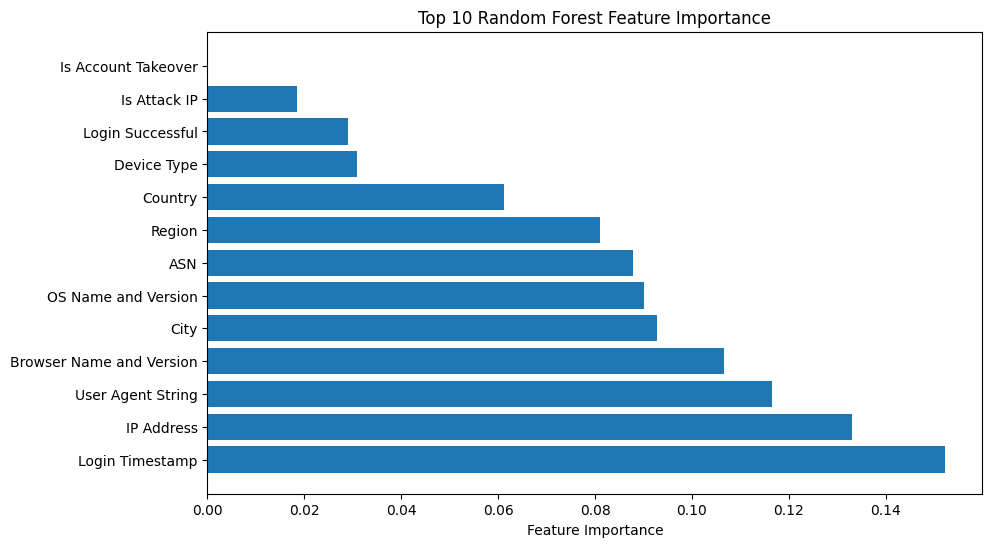

In [ ]:

# 특성 중요도 얻기
feature_importances = rf_model.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개의 중요한 특성만 선택
top_10_features = feature_importance_df.head(10)

# 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_1000_features['Feature'], top_1000_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importance')
plt.show()

In [ ]:
X.describe()

,Login Timestamp,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,67.000000,66.155556,7.844444,8.748148,17.385185,150648.325926,52.511111,20.474074,14.185185,0.792593
std,39.115214,38.671959,2.949492,9.201491,18.885351,162463.184310,29.116305,14.015892,7.196792,0.474677
min,0.000000,0.000000,0.000000,0.000000,0.000000,3280.000000,0.000000,0.000000,0.000000,0.000000
25%,33.500000,32.500000,7.000000,0.000000,0.000000,29695.000000,29.000000,6.500000,10.000000,1.000000
50%,67.000000,66.000000,7.000000,6.000000,9.000000,49528.000000,51.000000,19.000000,16.000000,1.000000
75%,100.500000,99.500000,9.000000,16.000000,33.000000,267862.000000,82.500000,29.000000,18.000000,1.000000
max,134.000000,132.000000,12.000000,25.000000,53.000000,500194.000000,98.000000,46.000000,26.000000,2.000000


In [ ]:
print(top_10_features)

                    Feature  Importance
0           Login Timestamp    0.152317
1                IP Address    0.133031
6         User Agent String    0.116623
7  Browser Name and Version    0.106719
4                      City    0.092767
8       OS Name and Version    0.090144
5                       ASN    0.087846
3                    Region    0.080996
2                   Country    0.061188
9               Device Type    0.030920


2. mouse 데이터 합쳤을 때

In [ ]:
file_path2 = f'/content/drive/MyDrive/Colab Notebooks/mouse_data.xlsx'

mouse_data = pd.read_excel(file_path2)

In [ ]:
all_data = pd.concat([login_data, mouse_data], axis=1)

In [ ]:
login_data

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482071,23,2670000000000000000,NaN,29,7,1,7,29695,46,19,18,1,True,False,False
2,482073,24,4660000000000000000,NaN,80,3,0,0,43646,88,2,13,0,True,False,False
4,482075,25,-8310000000000000000,NaN,5,4,3,8,29550,92,31,13,0,True,False,False
5,482076,26,2000000000000000000,NaN,119,4,0,0,29550,29,2,10,0,True,False,False
7,482078,27,3500000000000000000,NaN,17,1,10,50,500194,63,33,18,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,482434,18,4400000000000000000,NaN,3,9,0,0,201637,43,13,18,1,False,False,False
367,482438,19,-3440000000000000000,NaN,65,2,15,40,27887,20,2,16,2,True,False,False
368,482439,20,-5550000000000000000,NaN,27,7,4,42,29492,86,43,1,1,True,False,False
371,482442,21,-774000000000000000,NaN,26,7,4,16,29492,31,7,10,0,True,False,False


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
values_without_prefix = []

for index, row in top_1000_features.iterrows():
    prefix_found = False
    for val in row.values:
        for prefix in prefixes:
            if str(val).startswith(prefix):
                prefix_found = True
                break
        if not prefix_found:
            values_without_prefix.append(val)

print(values_without_prefix)


['Unnamed: 0', 0.02431128622361696, 'ASN', 0.02344913350786997, 'record timestamp', 0.023418475848830035, 'client timestamp', 0.021059366562192348, 'x', 0.019233060347133644, 'y', 0.015564574541589828, 'Login Successful', 0.007280405446244972, 'Round-Trip Time [ms]', 0.0002912755921318505]


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_counts = {}

for prefix in prefixes:
    prefix_count = 0
    for index, row in top_200_features.iterrows():
        # 각 행에서 prefix 등장 횟수 카운트
        count = sum(str(val).startswith(prefix) for val in row)
        prefix_count += count

    prefix_counts[prefix] = prefix_count

print(prefix_counts)


{'Login_onehot': 77, 'Location_onehot': 33, 'Platform_onehot': 83}


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_counts = {}

for prefix in prefixes:
    prefix_count = 0
    for index, row in top_1000_features.iterrows():
        # 각 행에서 prefix 등장 횟수 카운트
        count = sum(str(val).startswith(prefix) for val in row)
        prefix_count += count

    prefix_counts[prefix] = prefix_count

print(prefix_counts)


{'Login_onehot': 536, 'Location_onehot': 123, 'Platform_onehot': 333}


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_count = {}

for prefix in prefixes:
    count = sum(col.startswith(prefix) for col in X.columns)
    prefix_count[prefix] = count

    # 만약 prefix 뒤에 오는 모든 문구를 *로 포함하여 카운트하려면 아래와 같이 수정합니다.
    all_count = sum(col.startswith(prefix) for col in X.columns)
    prefix_count[prefix] = all_count

print(prefix_count)


{'Login_onehot': 658, 'Location_onehot': 187, 'Platform_onehot': 346}


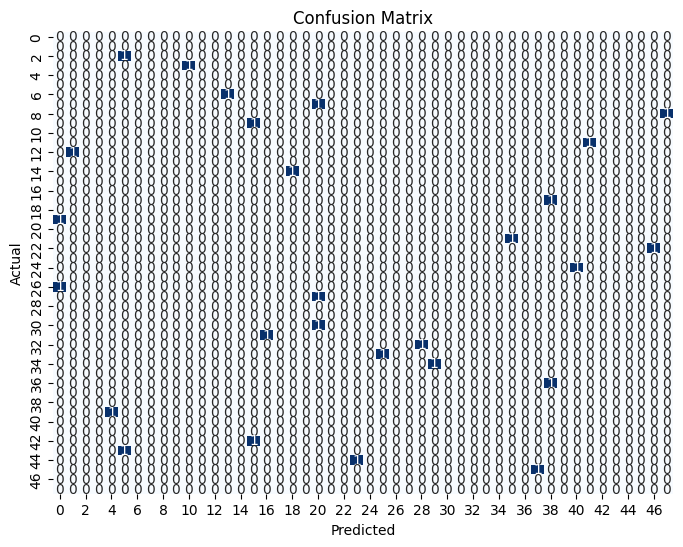

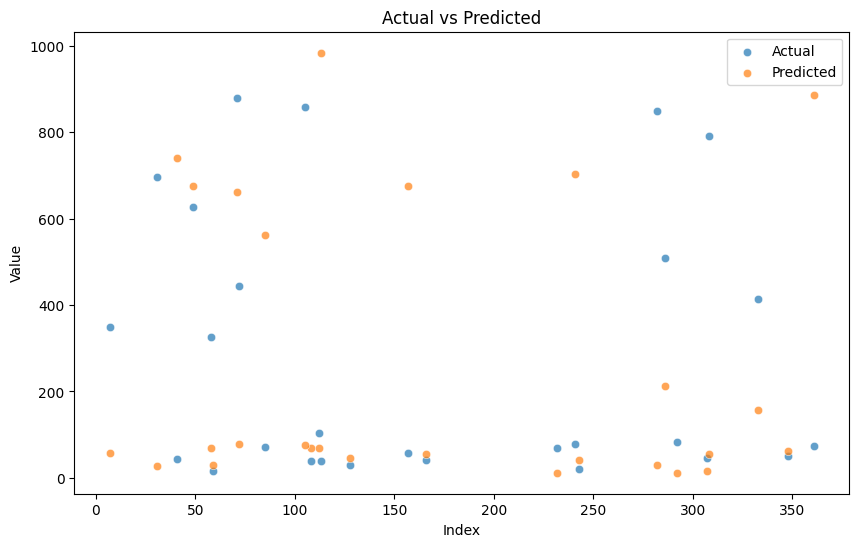

In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

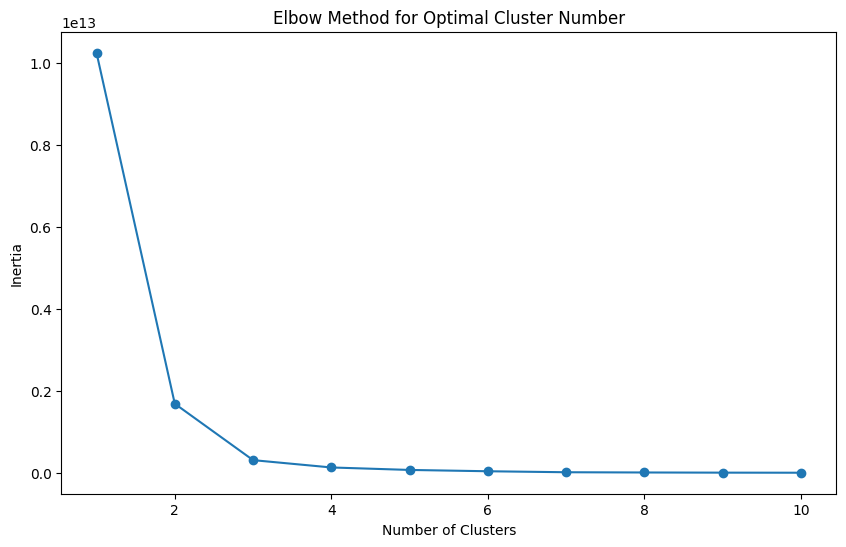

In [ ]:
# Elbow Method를 사용하여 적절한 클러스터 개수 찾기
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: ignored

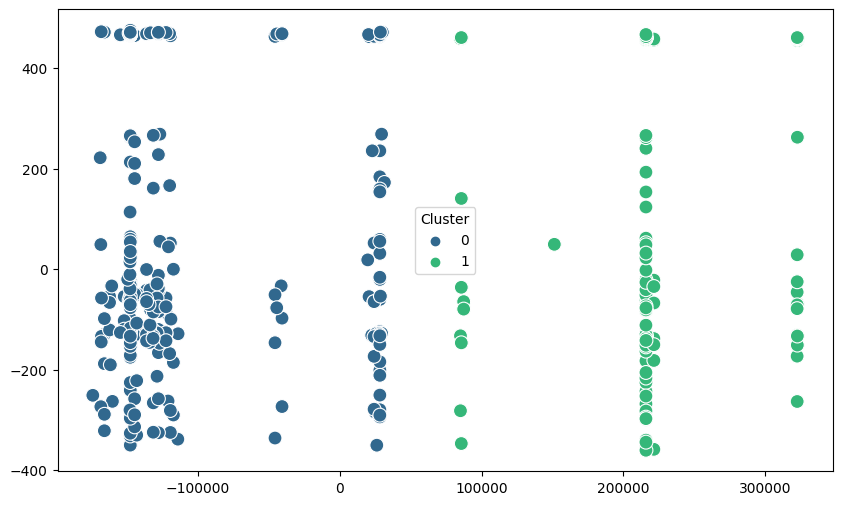

In [ ]:
# PCA를 사용하여 데이터 차원 축소 (2차원으로 설정)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
merged_data['Cluster'] = kmeans.fit_predict(X_pca)

# 시각화
plt.figure(figsize=(10, 6))

# 산점도 그리기
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster', data=merged_data, palette='viridis', s=100)

# 중심점 표시
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()